In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [67]:
train_data = pd.read_csv('/Users/saifuddinshaikh/Downloads/LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test_data = pd.read_csv('/Users/saifuddinshaikh/Downloads/LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

In [68]:
train_data.head(10)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
5,159,102,101,150,91,95,153,95,97,154,...,166,47,14,173,51,17,182,57,19,1
6,164,206,84,105,140,61,118,148,101,129,...,94,134,29,91,133,26,122,170,44,2
7,28,35,39,30,34,44,33,44,47,62,...,106,144,100,104,142,99,101,140,96,7
8,134,186,223,131,184,220,128,182,218,133,...,31,94,136,32,94,137,32,94,138,8
9,125,125,116,110,101,91,102,90,83,106,...,143,117,82,143,116,84,144,116,86,3


In [69]:
train_data.shape

(50000, 3073)

In [70]:
X_train = train_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'] 

In [71]:
X_train.shape

(50000, 3072)

In [72]:
X_train = X_train.reshape((50000, 32, 32, 3))

In [73]:
X_test = test_data.drop('label', axis=1).to_numpy()
y_test = test_data['label']

In [74]:
y_test.shape

(10000,)

In [75]:
X_test = X_test.reshape((10000, 32, 32, 3))

In [76]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [77]:
y_classes = {
0: "airplane",
1: "automobile",
2: "bird",
3: "cat",
4: "deer",
5: "dog",
6: "frog",
7: "horse",
8: "ship",
9: "truck"}

In [78]:
X_train.shape

(50000, 32, 32, 3)

In [79]:
def show_image(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[list(y[index]).index(1)])

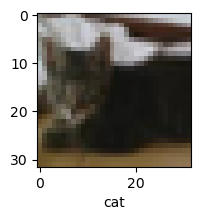

In [80]:
show_image(X_train,y_train,9)

In [81]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [82]:
model = Sequential([
    Dense(256,activation="relu"),
    Dropout(0.1),
    Dense(128,activation="relu"),
    Dropout(0.1),
    Dense(64,activation="relu"),
    Dropout(0.1),
    Dense(32,activation="relu"),
    Dropout(0.1),
    Flatten(),
    Dense(10,activation="softmax")
])

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 185s 234ms/step - loss: 1.6698 - accuracy: 0.4071 - val_loss: 1.4955 - val_accuracy: 0.4691
Epoch 2/25
 44/782 [>.............................] - ETA: 2:55 - loss: 1.4933 - accuracy: 0.4702

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(X_test,y_test)
accuracy = score[1] * 100
print(f'Test Accuracy: {accuracy:.2f}%')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
summarize_diagnostics(history)